# 머신러닝 모델 프로세스

![](http://saltlux.com/images/menu08/img06.png)

- 모델을 학습하기 위해서는 **데이터**가 필요합니다.
    - 캐글(인공지능 경진대회)에서 데이터를 연동하겠습니다.
    - 왼쪽 메뉴에서 **캐글 데이터 연동하기**, **캐글 데이터셋 가져오기**가 이에 해당합니다.
- 데이터 전처리 전에 원본 데이터를 탐색하고 특징을 확인할 수 있는 **EDA**(Exploratory Data Analysis)를 진행하겠습니다.
    - 왼쪽 메뉴에서 **데이터 확인 및 시각화**, **탐험적 데이터 분석*이 이에 해당합니다.
- 데이터 확인 후 모델 학습이 가능한 형태로 데이터를 가공하는 **데이터 전처리**를 진행하겠습니다.
    - 왼쪽 메뉴에서 **탐험적 데이터 분석**이 이헤 해당합니다.
- 모델을 학습하는 과정은 **특성 추출/학습**과 **학습 최적화** 단계를 통해 진행됩니다.
    - 왼쪽 메뉴에서 **모델 학습에 필요한 훈련 데이터 설정**, **모델 추가**, **하이퍼파라미터 튜닝**이 이헤 해당합니다.
- 모델 학습이 완료되면 예측하기 전에 **모델 성능**을 평가합니다.
    - 모델 성능에 따라 데이터 전처리, 모델 학습 과정을 반복할 수 있습니다.
    - 왼쪽 메뉴에서 **모델 성능 평가**가 이에 해당합니다.
- 완성된 모델은 **테스트 데이터에 사용**하여 결과(예측, 분리)를 확인할 수 있습니다.
    - 왼쪽 메뉴에서 **예측하기**가 이에 해당합니다.
- 캐글에서는 **테스트 결과를 제출**하여 점수를 확인할 수 있습니다.
    - 왼쪽 메뉴에서 **모델 제출하기**가 이에 해당합니다.

# 캐글 연동하기

### 상단 오른쪽 Register 버튼 클릭 후 회원 가입

![](https://t1.daumcdn.net/thumb/R1280x0.fpng/?fname=http://t1.daumcdn.net/brunch/service/user/aS4g/image/-ZkWulBiVQt_bzcVjBbNKj-9dPY.png)

### 로그인 후 Account 메뉴 선택

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb0ygrB%2Fbtq0Ao2bs89%2FzSvvFpfhY7VKUKNBX24H21%2Fimg.png)

### Create New API Token 을 클릭하여 토큰 파일 다운로드

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyKnxb%2Fbtq0A2Laxul%2FYxsIfKALJ8LphbMbhPZi60%2Fimg.png)

### 토큰 파일 업로드

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fwq1mG%2Fbtq0LOLn8da%2FPfQt3eUWUwjDnp19NTr1F0%2Fimg.png)

In [1]:
# 토큰 파일 업로드
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dgkim1108","key":"dbaf48f77bf8aa683b08a8ff2e1f1681"}'}

In [2]:
%ls kaggle.json

kaggle.json


- 파일명이 "kaggle.json"이라고 출력되면 토큰 입력 성공

In [3]:
# json 파일 이동

# Kaggle API 를 사용하기 위해서는 json 파일을 ~/.kaggle로 이동 시키는 작업이 필요합니다.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        207           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        344           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        992           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       6272           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      52903            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      13825            True  
connectx

# 캐글 데이터셋 가져오기

- 캐글 보스턴 주택 가격 예측하기 https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
- 예측 변수 → SalePrice

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

### 위 링크로 이동하여 New Notebook 옆 점 3개를 클릭한 후 Copy API command 선택

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FtK61N%2Fbtq0Dso3Orh%2FcvNBpePyBzTG3t6Nlz7YC0%2Fimg.png)

- 해당 메뉴가 안보일 경우 상단 메뉴에서 Data로 이동한 후 중단 부분에 kaggle cometitions download -c <대회 명칭> 을 복사해서 실행

In [4]:
# 캐글 주택 가격 데이터 가져오기

!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 66.5MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 10.6MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 9.52MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.5MB/s]


In [ ]:
# 내려받은 데이터 목록 확인
%ls

data_description.txt  kaggle.json   sample_submission.csv  train.csv
drive/                sample_data/  test.csv


# 데이터 확인 및 시각화

In [39]:
# 라이브러리 사용
import pandas as pd
import numpy as np

In [156]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
# 테스트 데이터 불러오기
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [158]:
# 데이터 유형 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 변수 설명

집에 대한 특징 값들과 도로 종류, 지어진 연도, 지붕 형태, 지하실 상태 등에 대한 속성이 포함되어 있습니다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FsVcpQ%2FbtqEC9efaIr%2FRH7eCOHe2xXhpt8D1d2Uh0%2Fimg.png)

# 탐험적 데이터 분석

훌륭한 데이터 사이언티스트와 그렇지 않은 데이터 사이언티스트의 차이점 중 하나는 데이터를 분석하는 능력, 일명 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis), 이하 EDA) 입니다. 훌륭한 데이터 사이언티스트는 새로운 캐글 경진대회에 참여하거나, 업무상으로 데이터를 처음 받아서 분석할 때, 적어도 이틀에서 길면 일주일까지는 머신러닝 모델을 만들지 않고 끈기있게 데이터를 분석합니다.

왜 머신러닝 모델을 처음에 만들지 않을까요? 보통 우리가 머신러닝 모델을 만들때는 [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))을 활용해 머신러닝 모델의 성능을 측정하고, 여기에서 점수로 피드백을 받아 모델을 개선해나갑니다. 이 방식은 초반에는 어렵지만, 훨씬 직관적이며 try and error 방식으로 모델을 점진적으로 개선해 나갈 수 있습니다.

하지만 이 방식에는 단점이 있는데, 모델이 개선되었을 때(=점수가 좋아졌을 때) 왜 개선되었는지, 개선되지 않았을 때(=점수가 좋아지지 않았을 때) 왜 개선되지 않았는지를 명확히 알기 어렵다는 것입니다. 이를 알 수 없으면, 우리는 아무런 의미 없이 반복적으로 Cross Validation를 실행하기만 할 뿐, 모델을 개선할 구체적인 전략을 짜는게 어려워집니다.

![cross validation](http://drive.google.com/uc?export=view&id=1pLWYdVHkUmQobVgxhbIDQPrYXvC4bBEF)

<small><center><b>이렇게 Cross Validation을 통해 모델의 성능을 정량적으로 측정한 뒤(=점수로 확인한 뒤) 모델을 개선할 수도 있지만,</b></center></small>
<small><center><b>이 경우에는 이 점수가 좋아졌을 때 왜 좋아졌고, 점수가 안 좋아졌을 때 왜 안 좋아졌는지를 명확하게 파악하기 어렵습니다.</b></center></small>

그래서 훌륭한 데이터사이언티스트는 데이터를 처음 받았을 때 적어도 이틀, 길면 일주일까지 이틀에서 길면 일주일까지 Cross Validation를 하지 않고 1) 엑셀 분석과 2) 데이터 시각화를 통해 데이터를 완벽히 이해할려고 노력합니다. 언제까지 분석해야 할까요? 우리가 이 데이터를 완벽하게 이해했다고 확신하기 전 까지 데이터를 분석해야 하며, 그 전에는 절대로 모델을 만들고 Cross Validation으로 모델을 개선해나가는 것을 권장하지 않습니다.

탐험적 데이터를 할 때 사용하는 파이썬 패키지는은 자유롭게 선택할 수 있지만, 일단 데이터 시각화에서는 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)만을 사용한다고 간주하겠습니다.

In [159]:
# 라이브러리 사용
import matplotlib.pyplot as plt
import seaborn as sns

### 이상치 확인 및 변수 비교

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


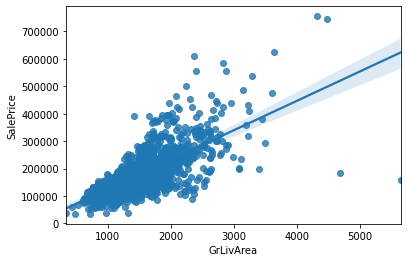

In [160]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

### 데이터 치우침 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


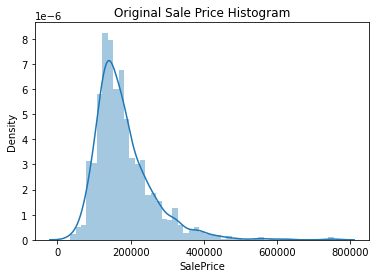

In [161]:
plt.title('Original Sale Price Histogram')
sns.distplot(train['SalePrice'])

### 상관분석

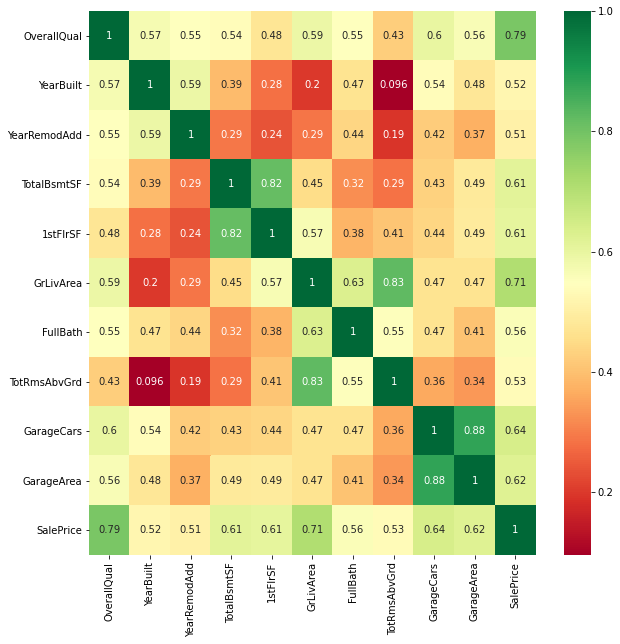

In [162]:
corr = train.corr()
corr_features = corr.index[abs(corr["SalePrice"]) >= 0.5]  # 상관관계 0.5 이상

plt.figure(figsize=(10,10))
g = sns.heatmap(
    train[corr_features].corr(),
    annot=True,
    cmap="RdYlGn"
)

### 1에 가까울 수록 변수에 영향이 높다고 판단할 수 있음

# 데이터 전처리

수치형의 특성(feature)부터 시작합니다.

누락된 값(데이터가 없는 경우)은 평균값으로 채워 넣는 것으로 시작하며, 여기서는 0 값으로 대체하겠습니다.

스케일 조정(모든 특성 값을 동일하게 변환)은 평균 0, 분산 1로 조정합니다.


### 데이터 확인

In [163]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [164]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


### 불필요한 특성 제거

데이터를 확인한 결과 ID라는 특성이 확인되는데, 이 값은 모델이 학습 데이터를 구분하는데 활용할 수 있지만 예측 목적에는 적합하지 않아 데이터 셋에서 제거하는 과정을 진행합니다.

In [165]:
train = train.drop(['Id'], axis = 1)
train.shape

(1460, 80)

In [166]:
test = test.drop(['Id'], axis = 1)
test.shape

(1459, 79)

데이터에서 문자 데이터를 제외하겠습니다.

In [167]:
#train = train.select_dtypes(include = ['float', 'int'])
train.shape

(1460, 80)

In [168]:
#test = test.select_dtypes(include = ['float', 'int'])
test.shape

(1459, 79)

### 수치형 데이터 설정
- 스케일 조정
- 누락된 값 대체

In [169]:
# 수치형 데이터 설정
numeric_features = train.dtypes[train.dtypes != 'object'].index

# 스케일 조정
train[numeric_features] = train[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

# 누락된 값 0으로 대체
train = train.fillna(0)

In [170]:
# 수치형 데이터 설정
numeric_features = test.dtypes[test.dtypes != 'object'].index

# 스케일 조정
test[numeric_features] = test[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))

# 누락된 값 0으로 대체
test = test.fillna(0)

### 범주형 데이터 설정

불연속된 값(discrete value)들을 다뤄보겠습니다.

문자형 데이터를 표현하기 위해 원-핫-인코딩(one-hot-encoding)을 이용해서 가변수로 변환합니다.

Pandas는 이를 자동으로 해주는 기능을 제공합니다.

In [171]:
train.shape
train.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.07335,RL,-0.207948,-0.207071,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651256,-0.517023,1.050634,0.878367,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.50984,Gd,TA,PConc,Gd,TA,No,GLQ,0.575228,Unf,-0.288554,-0.944267,-0.459145,GasA,Ex,Y,SBrkr,-0.793162,1.161454,-0.120201,0.370207,1.107431,-0.240978,0.78947,1.227165,0.163723,-0.211381,Gd,0.911897,Typ,-0.950901,0,Attchd,0.992066,RFn,0.311618,0.35088,TA,TA,Y,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,0,0,0,-0.087658,-1.598563,0.13873,WD,Normal,0.347154


In [172]:
train = pd.get_dummies(train)
train.shape

(1460, 305)

In [173]:
test.shape

(1459, 79)

In [174]:
test = pd.get_dummies(test)
test.shape

(1459, 292)

# 모델 학습에 필요한 훈련 데이터 설정

### Train
전처리(preprocessing)가 끝났으면, 이제 이 데이터를 활용해 머신러닝 알고리즘을 학습(train)시켜 보겠습니다.

지도학습(Supervised Learning) 알고리즘을 사용할 생각이기 때문에, 데이터를 Label(맞춰야 하는 정답)과 Feature(Label을 맞추는데 도움이 되는 값들)로 나눌 필요가 있습니다.

따라서 다음의 컬럼들을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 날짜(```Date```), 시가(```Open```), 고가(```High```), 저가(```Low```), 거래량(```Volume```)
  * **Label**: 종가(Close)를 사용합니다.

이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

In [175]:
# 특성 확인
print(len(train.columns))
train.columns

305


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [176]:
# 라벨 위치 확인
train_list = train.columns.tolist()
print(train_list.index('SalePrice'))

36


### 특성 설정

In [178]:
feature_names = train.columns[:train_list.index('SalePrice')]
print(len(feature_names))
feature_names

36


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### 라벨 설정

In [179]:
label_name = "SalePrice"
label_name

'SalePrice'

In [180]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

In [181]:
# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

(1460, 36)


In [182]:
# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073350,-0.207948,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.509840,0.575228,-0.288554,-0.944267,-0.459145,-0.793162,1.161454,-0.120201,0.370207,1.107431,-0.240978,0.789470,1.227165,0.163723,-0.211381,0.911897,-0.950901,0.992066,0.311618,0.350880,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730
1,-0.872264,0.409724,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.572637,1.171591,-0.288554,-0.641008,0.466305,0.257052,-0.794891,-0.120201,-0.482347,-0.819684,3.947457,0.789470,-0.761360,0.163723,-0.211381,-0.318574,0.600289,-0.101506,0.311618,-0.060710,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228
2,0.073350,-0.084413,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322063,0.092875,-0.288554,-0.301540,-0.313261,-0.627611,1.188943,-0.120201,0.514836,1.107431,-0.240978,0.789470,1.227165,0.163723,-0.211381,-0.318574,0.600289,0.911061,0.311618,0.631510,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730
3,0.309753,-0.413838,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.572637,-0.499103,-0.288554,-0.061648,-0.687089,-0.521555,0.936955,-0.120201,0.383528,1.107431,-0.240978,-1.025689,-0.761360,0.163723,-0.211381,0.296662,0.600289,0.789553,1.649742,0.790533,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186
4,0.073350,0.574436,0.375020,1.374324,-0.517023,0.951306,0.733056,1.360357,0.463410,-0.288554,-0.174805,0.199611,-0.045596,1.617323,-0.120201,1.298881,1.107431,-0.240978,0.789470,1.227165,1.389547,-0.211381,1.527133,0.600289,0.870558,1.649742,1.697903,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730


In [183]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

In [184]:
# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

(1459, 36)


In [185]:
# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.874411,0.510333,0.363804,-0.750844,0.400629,-0.340828,-1.072517,-0.566973,0.063251,0.516994,-0.650173,-0.370554,-0.654337,-0.774988,-0.080456,-1.215171,-0.818725,-0.25826,-1.028367,-0.750782,-1.029190,-0.20384,-0.918020,-0.897747,-0.632632,-0.987335,1.185131,0.366553,-0.701387,-0.360615,-0.088796,1.818336,-0.057207,-0.092212,-0.038268,1.713318
1,-0.874411,0.555022,0.897553,-0.054858,0.400629,-0.439544,-1.214492,0.041046,1.062663,-0.297698,-0.339145,0.638706,0.433150,-0.774988,-0.080456,-0.323429,-0.818725,-0.25826,-1.028367,1.237224,0.175937,-0.20384,-0.255283,-0.897747,-0.746135,-0.987335,-0.740704,2.347063,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,19.723675,-0.038268,1.713318
2,0.061330,0.242199,0.809368,-0.750844,-0.497247,0.843770,0.678509,-0.566973,0.772723,-0.297698,-0.954339,-0.266693,-0.573968,0.891638,-0.080456,0.294407,-0.818725,-0.25826,0.772818,1.237224,0.175937,-0.20384,-0.255283,0.646844,0.729396,0.301416,0.042530,0.930176,-0.207799,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-1.140224,1.713318
3,0.061330,0.420955,0.032053,-0.054858,0.400629,0.876675,0.678509,-0.454377,0.357583,-0.297698,-0.526677,-0.271209,-0.578991,0.836956,-0.080456,0.242921,-0.818725,-0.25826,0.772818,1.237224,0.175937,-0.20384,0.407454,0.646844,0.767230,0.301416,-0.012757,2.088735,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.038268,1.713318
4,1.464941,-1.143162,-0.971475,1.337113,-0.497247,0.679242,0.394559,-0.566973,-0.387033,-0.297698,1.058191,0.528071,0.310085,-0.774988,-0.080456,-0.424342,-0.818725,-0.25826,0.772818,-0.750782,-1.029190,-0.20384,-0.918020,-0.897747,0.540225,0.301416,0.153105,-0.729382,0.489031,-0.360615,-0.088796,2.242291,-0.057207,-0.092212,-1.874861,1.713318


In [186]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

In [187]:
# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

(1460,)


In [188]:
# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

0    0.347154
1    0.007286
2    0.535970
3   -0.515105
4    0.869545
Name: SalePrice, dtype: float64

In [189]:
# scikit-learn의 model_selection 모듈에서 train_test_split 함수를 가져옵니다.

# 이 함수는 데이터를 일정 비율로 두 개로 쪼개는 역할을 담당합니다.
from sklearn.model_selection import train_test_split

# train 데이터를 두 개로 쪼갭니다. 쪼개는 비율은 7:3으로 할 것이며

# 7의 부분이 X_train_kf와 y_train_kf로 들어가고, 3의 부분이 X_test_kf와 y_test_kf로 들어갑니다.

# 실행할때마다 매 번 동일한 결과가 나오도록 하기 위해 random_state 옵션을 줘서 seed를 고정시킵니다.

X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
train_test_split(X_train, y_train, test_size = 0.15, random_state = 2021)

# X_train_kf와 y_train_kf 변수에 할당된 데이터의 사이즈를 출력합니다.

# 출력은 (row, column) 으로 표시됩니다.
print(X_train_kf.shape, y_train_kf.shape)

# X_test_kf와 y_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.

# 출력은 (row, column) 으로 표시됩니다.
print(X_test_kf.shape, y_test_kf.shape)

(1241, 36) (1241,)
(219, 36) (219,)


# (4일차 추가 부분) 모델 (알고리즘) 추가

이전에 사용한 회귀 모형과 그래디언트 부스팅 머신(Gradient Boosting Machine)을 사용하겠습니다.

그래디언트 부스팅 머신은 의사결정나무(Decision Tree)에 그래디언트 부스팅(Boosting Machine)이라는 알고리즘을 적용한 모델인데, 정형화 데이터(Structured Data)에 한해서는 가장 강력한 머신러닝 알고리즘이라고 불리우고 있습니다. 

알고리즘의 동작 원리는 다음과 같습니다.

  1. 의사결정나무(Decision Tree)를 하나 학습합니다.
  1. 1번에서 학습한 의사결정나무를 통해, 학습(train)데이터를 예측합니다. 그리고 예측값과 정답의 차이(residual)를 계산합니다.
  1. 위 차이(residual)를 보정하는 또 하나의 의사결정나무(Decision Tree)를 학습합니다. 두 번째 의사결정나무에서는 차이를 입력값으로 받고, 차이를 보정하기 위해서는 얼만큼의 보정값이 필요한지를 예측합니다.
위 방식을 끊임없이 반복합니다.

이러한 방식을 거치면 의사결정나무(Decision Tree)보다 더 강력한 알고리즘을 구현할 수 있습니다.

자세한 설명은 다음의 링크들을 참고하시면 됩니다.

  * [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
  * [Gradient Boosting from scratch](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)
  * [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  
이번에는 그래디언트 부스팅 머신(Gradient Boosting Machine) 구현체 중 하나인 GradientBoostingRegressor을 사용하는데, GradientBoostingRegressor에는 크게 두 가지 기능이 있습니다.

  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: fit이 끝나면, 이후에 predict를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

In [190]:
# 기존 모델
from sklearn.linear_model import LinearRegression

In [191]:
# 비교 모델 추가
from sklearn.ensemble import GradientBoostingRegressor

# (4일차 추가 부분) 하이퍼파라미터 튜닝

머신러닝 모델에는 다양한 옵션이 있는데, 이 옵션을 통해 모델의 성능을 끌어올릴 수 있습니다.

이 옵션들을 전문용어로 하이퍼패러미터(Hyperparameter)라고 부릅니다.

만일 적절한 하이퍼패러미터를 찾아서 모델에 적용할 수 있다면 모델의 성능을 한 층 더 끌어올릴 수 있으며, 이를 하이퍼패러미터 튜닝(Hyperparamter Tuning)이라고 합니다.

## Random Search

하이퍼패러미터를 튜닝하는 가장 일반적인 방식은 랜덤 서치(Random Search) 입니다.

<img src="http://cs231n.github.io/assets/nn3/gridsearchbad.jpeg" alt="Random Search for Hyper-Parameter Optimization" style="width: 360px;"/>

<p style="text-align: center;">
  <small>
  </small>
</p>
<p style="text-align: center;">
  <small>
  </small>
</p>

위 그림과 같이 Grid Search를 활용하면 가장 좋은 성능을 내는 하이퍼패러미터를 찾기 어렵기 때문에 이런 경우 Random Search를 사용하는 것이 효율적입니다.

In [192]:
# 라이브러리 사용
from sklearn.model_selection import GridSearchCV

### 기존 모델 : LinearRegression

In [193]:
# 모델 설정
model = LinearRegression()

In [194]:
# 모델 학습
model.fit(X_train_kf, y_train_kf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
# 모델 성능 확인
print('훈련 데이터 Accuracy : {0:.3%}'.format(model.score(X_train_kf, y_train_kf)))

# 검증용 데이터 성능 확인
print('검증용 데이터 Accuracy : {0:.3%}'.format(model.score(X_test_kf, y_test_kf)))

훈련 데이터 Accuracy : 81.210%
검증용 데이터 Accuracy : 80.821%


### 추가 모델 (튜닝 없음) : GradientBoostingRegressor

In [196]:
# 모델 설정
model2 = GradientBoostingRegressor()

In [197]:
# 모델 학습
model2.fit(X_train_kf, y_train_kf)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [198]:
# 모델 성능 확인
print('훈련 데이터 Accuracy : {0:.3%}'.format(model2.score(X_train_kf, y_train_kf)))

# 검증용 데이터 성능 확인
print('검증용 데이터 Accuracy : {0:.3%}'.format(model2.score(X_test_kf, y_test_kf)))

훈련 데이터 Accuracy : 96.332%
검증용 데이터 Accuracy : 88.673%


### 추가 모델 (튜닝 있음) : GradientBoostingRegressor

In [199]:
# 하이퍼파라미터 설정
n_estimators = [10, 20, 30, 1000, 10000]
learning_rate = [0.01, 0.05, 0.1, 0.5, 0.003]

param = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators
}

In [200]:
# 최적의 하이퍼파라미터 검색
model3_grid = GridSearchCV(GradientBoostingRegressor(), param, cv = 3)

In [201]:
# 튜닝된 모델로 학습 진행
%time model3_grid.fit(X_train_kf, y_train_kf)

CPU times: user 8min 15s, sys: 606 ms, total: 8min 16s
Wall time: 8min 14s


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [208]:
# 베스트 하이퍼파라미터 확인
model3_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [209]:
# 모델 성능 확인
print('훈련 데이터 Accuracy : {0:.3%}'.format(model3_grid.score(X_train_kf, y_train_kf)))

# 검증용 데이터 성능 확인
print('검증용 데이터 Accuracy : {0:.3%}'.format(model3_grid.score(X_test_kf, y_test_kf)))

훈련 데이터 Accuracy : 99.835%
검증용 데이터 Accuracy : 89.504%


In [210]:
# 모델 성능 비교
pd.DataFrame({
    #'알고리즘': ['선형 회귀', '그래디언트 부스팅 머신', '그래디언트 부스팅 머신'],
    '알고리즘': ['model', 'model2', 'model3'],
    '하이퍼파라미터 튜닝': ['없음', '없음', '있음'],
    '정확도': [
            model.score(X_train_kf, y_train_kf),
            model2.score(X_train_kf, y_train_kf),
            model3_grid.score(X_train_kf, y_train_kf)
    ]
}).sort_values(by='정확도', ascending=False)

,알고리즘,하이퍼파라미터 튜닝,정확도
2,model3,있음,0.998353
1,model2,없음,0.963320
0,model,없음,0.812103


- 하이퍼파라미터 튜닝이 있는 모델의 알고리즘 성능이 가장 높음

### 훈련 결과 확인

In [212]:
model3_grid

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [213]:
params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_split': 2,
    'learning_rate': 0.1,
    'loss': 'ls'
}

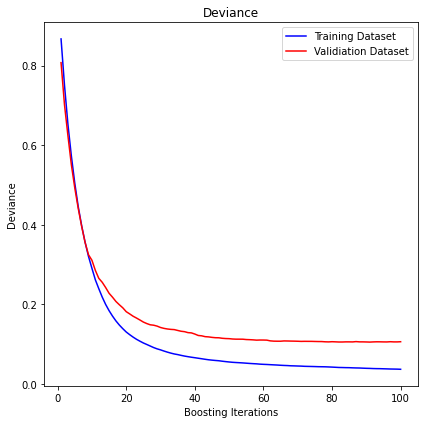

In [214]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(model2.staged_predict(X_test_kf)):
    test_score[i] = model2.loss_(y_test_kf, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model2.train_score_, 'b-',
         label='Training Dataset')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Validiation Dataset')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# 모델 성능 평가

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcmangf%2FbtqKSgcfl8X%2FXO7q4FXg82JK605LltQRok%2Fimg.jpg)

MAE(Mean Absolute Error)는 실제값과 예측값의 차이를 절댓값으로 변환하여 평균한 것을 의미합니다.

In [215]:
# MAE 확인하기
import sklearn

# model
y_predict_test_kf = model.predict(X_test_kf)
print('Linear Regression MAE : {:.3f}'.format(sklearn.metrics.mean_absolute_error(y_test_kf, y_predict_test_kf)))

# model2
y_predict_test_kf = model2.predict(X_test_kf)
print('Gradient Boosting MAE : {:.3f}'.format(sklearn.metrics.mean_absolute_error(y_test_kf, y_predict_test_kf)))

# model3
y_predict_test_kf = model3_grid.predict(X_test_kf)
print('Gradient Boosting Hyperparameter Tuning MAE : {:.3f}'.format(sklearn.metrics.mean_absolute_error(y_test_kf, y_predict_test_kf)))

Linear Regression MAE : 0.274
Gradient Boosting MAE : 0.199
Gradient Boosting Hyperparameter Tuning MAE : 0.194


- 값이 작을수록 예측값과 실제값의 차이가 없으며, 성능이 우수함

# 예측하기

머신러닝 모델의 fit 함수로 학습을 시킵니다.

학습할 때는 1) train 데이터의 feature인 X_train, 그리고 2) train 데이터의 label인 y_train이 필요합니다.

In [ ]:
# 머신러닝 모델을 학습(fitting)합니다.

# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.

# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time model3_grid.fit(X_train, y_train)

CPU times: user 10min 38s, sys: 639 ms, total: 10min 38s
Wall time: 10min 36s


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [150]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.

# 이 결과를 prediction_list라는 이름의 변수에 할당합니다.
prediction_list = model3_grid.predict(X_test)

In [151]:
# prediction_list를 화면에 출력합니다.
prediction_list

array([-0.57647303, -0.41756708, -0.00911682, ...,  0.11316766,
       -0.74146047,  0.91140786])

# 모델 제출하기

예측 후 캐글(kaggle)이 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장하는 것만 남았습니다.

캐글에서는 train.csv 데이터와 test.csv 데이터 외에 sample_submission.csv라는 제출 포멧을 제공합니다.

In [152]:
%ls

data_description.txt  sample_submission.csv         train.csv
kaggle.json           submission_v0.1_20210708.csv
sample_data/          test.csv


In [153]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [154]:
result = pd.DataFrame()
result['Id'] = submission['Id']
result['SalePrice'] = prediction_list
result.head()

,Id,SalePrice
0,1461,-0.576473
1,1462,-0.417567
2,1463,-0.009117
3,1464,0.189243
4,1465,0.043035


In [155]:
# 예측 결과 다운로드하기
result.to_csv('submission_v0.3_20210708.csv', index=False)

# 코랩과 구글드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 내 드라이브 확인
%cd /content/
!ls drive/MyDrive/

/content
 회사   개인   크몽  'Colab Notebooks'	 docker-crawling   Software


In [ ]:
# 현재 위치 확인
%pwd

'/content'

### 파일 경로 복사 후 코랩에서 데이터 사용 가능

![](https://t1.daumcdn.net/cfile/tistory/995FA7365F7304D816)

In [ ]:
# 구글 드라이브로 데이터 다운로드
result.to_csv('/content/drive/MyDrive/Colab Notebooks/data/submission_v0.1_20210708.csv', index=False)

In [ ]:
# 구글 드라이브에서 데이터 확인하기
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/submission_v0.1_20210708.csv')

,Id,SalePrice
0,1461,-5.502017e+09
1,1462,-8.376119e+09
2,1463,-4.952588e+09
3,1464,-8.498190e+09
4,1465,-2.000122e+10
...,...,...
1454,2915,-3.442724e+10
1455,2916,-3.064015e+10
1456,2917,-7.509451e+09
1457,2918,-2.768407e+10
